## 1. Importing Libraries

In [3]:
import pandas as pd
import warnings
import string
from nltk.tokenize import word_tokenize, sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings("ignore")

In [4]:
!pip install pandas matplotlib seaborn nltk

In [5]:
import spacy.cli
spacy.cli.download("en_core_web_sm")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


## 2. Reading the Data

In [7]:
df = pd.read_csv("Resume.csv")
df = df.drop(columns=["ID", "Resume_html"], axis=1)
df.sample(15)

,Resume_str,Category
2417,LEAD ENGINEER - FLUID SYSTEMS AND THE...,AVIATION
744,PRACTICE MANAGER Educatio...,HEALTHCARE
1686,"ADJUNCT INSTRUCTOR, VOLUNTEER CAREER ...",APPAREL
1808,ACCOUNTANT Professional Summary...,ACCOUNTANT
1457,FOOD SERVER Professional Summar...,CHEF
1666,ASSISTANT BANKING CENTER MANAGER I ...,APPAREL
1848,ACCOUNTANT Summary Fina...,ACCOUNTANT
340,TEACHER Summary Obtain a pos...,TEACHER
44,HR COORDINATOR Summary Highl...,HR
1050,SALES DIRECTOR Summary \n\n...,SALES


## 3. Basic EDA

In [9]:
df.shape

(2484, 2)

In [10]:
df.isnull().sum()

Resume_str    0
Category      0
dtype: int64

In [11]:
df.duplicated().sum()

np.int64(2)

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.shape


(2482, 2)

In [14]:
print(df['Category'].unique())

['HR' 'DESIGNER' 'INFORMATION-TECHNOLOGY' 'TEACHER' 'ADVOCATE'
 'BUSINESS-DEVELOPMENT' 'HEALTHCARE' 'FITNESS' 'AGRICULTURE' 'BPO' 'SALES'
 'CONSULTANT' 'DIGITAL-MEDIA' 'AUTOMOBILE' 'CHEF' 'FINANCE' 'APPAREL'
 'ENGINEERING' 'ACCOUNTANT' 'CONSTRUCTION' 'PUBLIC-RELATIONS' 'BANKING'
 'ARTS' 'AVIATION']


In [15]:
df["Category"].value_counts()

Category
INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
ADVOCATE                  118
CHEF                      118
ENGINEERING               118
ACCOUNTANT                118
FINANCE                   117
FITNESS                   117
SALES                     116
AVIATION                  116
BANKING                   115
HEALTHCARE                115
CONSULTANT                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: count, dtype: int64

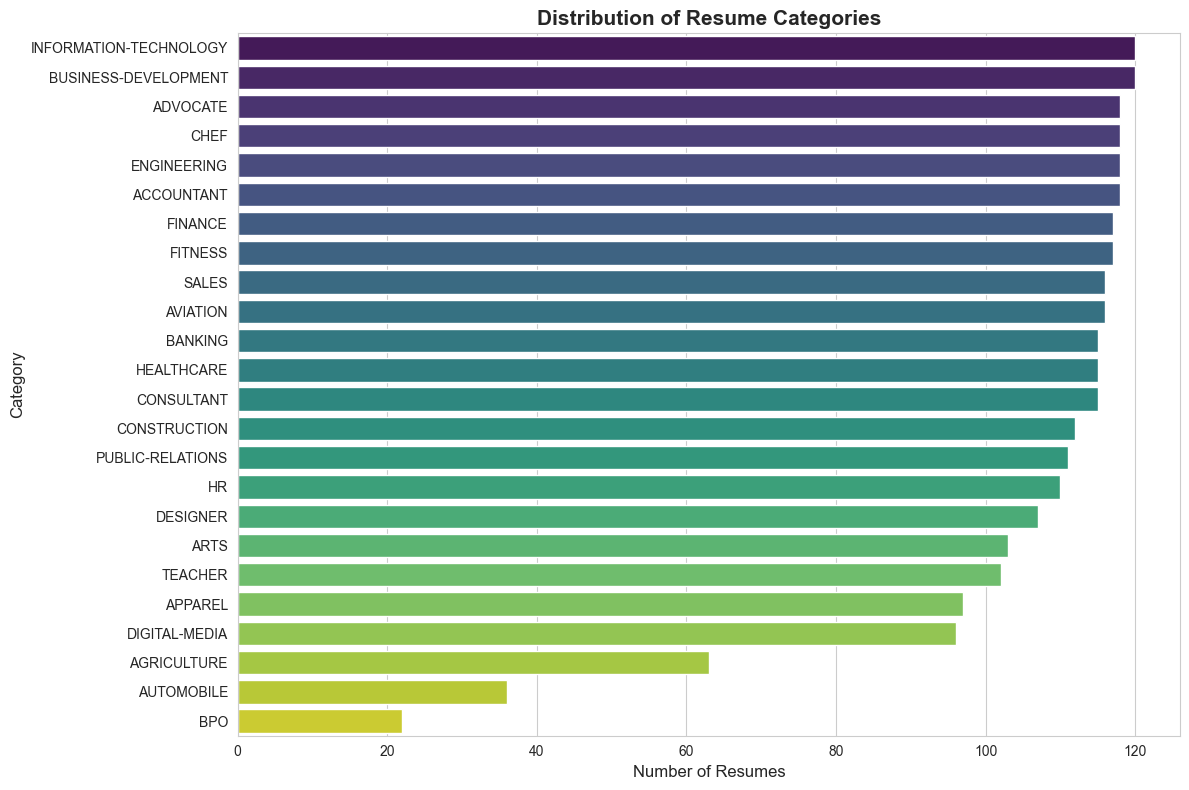

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))

# Count and sort categories
category_counts = df["Category"].value_counts()

# Plot with sorted values and better style
sns.set_style("whitegrid")
sns.barplot(x=category_counts.values, y=category_counts.index, palette="viridis")

# Add labels and title
plt.xlabel("Number of Resumes", fontsize=12)
plt.ylabel("Category", fontsize=12)
plt.title("Distribution of Resume Categories", fontsize=15, weight='bold')
plt.tight_layout()
plt.show()


In [17]:
df["Resume_str"][1]

"         HR SPECIALIST, US HR OPERATIONS       Summary     Versatile  media professional with background in Communications, Marketing, Human Resources and Technology.\xa0        Experience     09/2015   to   Current     HR Specialist, US HR Operations    Company Name   －   City  ,   State       Managed communication regarding launch of Operations group, policy changes and system outages      Designed standard work and job aids to create comprehensive training program for new employees and contractors         Audited job postings for old, pending, on-hold and draft positions.           Audited union hourly, non-union hourly and salary background checks and drug screens             Conducted monthly new hire benefits briefing to new employees across all business units               Served as a link between HR Managers and vendors by handling questions and resolving system-related issues         Provide real-time process improvement feedback on key metrics and initiatives  Successfully r

## 3. Text Preprocessing

In [19]:
nlp = spacy.load("en_core_web_sm")

In [20]:
def transform_text(text):
    doc = nlp(text.lower())  # lowercase and process with spaCy
    words = []

    for token in doc:
        if token.is_alpha and not token.is_stop:
            words.append(token.lemma_)  # use base form of word

    return " ".join(words)


In [21]:
transform_text("         HR SPECIALIST, US HR OPERATIONS       Summary     Versatile  media professional with background in Communications, Marketing, Human Resources and Technology.\xa0        Experience     09/2015   to   Current     HR Specialist, US HR Operations    Company Name   －   City  ,   State       Managed communication regarding launch of Operations group, policy changes and system outages      Designed standard work and job aids to create comprehensive training program for new employees and contractors         Audited job postings for old, pending, on-hold and draft positions.           Audited union hourly, non-union hourly and salary background checks and drug screens             Conducted monthly new hire benefits briefing to new employees across all business units               Served as a link between HR Managers and vendors by handling questions and resolving system-related issues         Provide real-time process improvement feedback on key metrics and initiatives  Successfully re-branded US HR Operations SharePoint site  Business Unit project manager for RFI/RFP on Background Check and Drug Screen vendor         01/2014   to   05/2015     IT, Marketing and Communications Co-op    Company Name   －   City  ,   State      Posted new articles, changes and updates to corporate SharePoint site including graphics and visual communications.  Researched and drafted articles and feature stories to promote company activities and programs.  Co-edited and developed content for quarterly published newsletter.  Provided communication support for internal and external events.")

'hr specialist hr operation summary versatile medium professional background communication marketing human resource technology experience current hr specialist hr operation company city state manage communication launch operation group policy change system outage design standard work job aid create comprehensive training program new employee contractor audit job posting old pending hold draft position audit union hourly non union hourly salary background check drug screen conduct monthly new hire benefit briefing new employee business unit serve link hr manager vendor handle question resolve system relate issue provide real time process improvement feedback key metric initiative successfully brand hr operation sharepoint site business unit project manager rfi rfp background check drug screen vendor marketing communication co op company city state post new article change update corporate sharepoint site include graphic visual communication research draft article feature story promote co

In [22]:
df["cleaned_text"] = df["Resume_str"].apply(transform_text)

In [23]:
df.sample(15)

,Resume_str,Category,cleaned_text
196,3D DESIGNER/ GRAPHIC DESIGNER ...,DESIGNER,graphic designer summary seek position experie...
468,FULFILLMENT ADVOCATE Summary ...,ADVOCATE,fulfillment advocate summary guadalajara jalis...
927,DRIVER Summary Biologica...,AGRICULTURE,driver summary biological science technician y...
1994,LABOER FLOOR CONSTRUCTION WORKER (ALL...,CONSTRUCTION,laboer floor construction worker round experie...
528,RN / ASST. HEAD NURSE PRACTICE LEADER...,ADVOCATE,rn asst head nurse practice leader skill care ...
2320,PACKAGING BUYER/RESEARCH AND DEVELOPM...,ARTS,packaging buyer research development lead summ...
1408,SOUS CHEF Summary To bri...,CHEF,sous chef summary bring positive attitude stro...
126,PRODUCT DESIGNER Professional S...,DESIGNER,product designer professional summary year eng...
1292,PAID MEDIA SPECIALIST Summary ...,DIGITAL-MEDIA,pay medium specialist summary enthusiastic emp...
280,INFORMATION TECHNOLOGY COORDINATOR ...,INFORMATION-TECHNOLOGY,information technology coordinator professiona...


In [24]:
df["num_of_words"] = df["cleaned_text"].apply(lambda x: len(word_tokenize(x)))

In [25]:
df["num_of_sentences"] = df["cleaned_text"].apply(lambda x: len(sent_tokenize(x)))

In [26]:
df.sample(15)

,Resume_str,Category,cleaned_text,num_of_words,num_of_sentences
2161,BUSINESS BANKING SPECIALIST ...,BANKING,business banking specialist summary year exper...,737,1
854,BRANCH LOGISTICS MANAGER Execut...,FITNESS,branch logistic manager executive summary reli...,713,1
551,OVERNIGHT PHARMACY TECHNICIAN ...,ADVOCATE,overnight pharmacy technician professional sum...,561,1
506,MERCHANT SERVICES ADVOCATE Summ...,ADVOCATE,merchant service advocate summary management e...,477,1
7,HR MANAGER Professional Summa...,HR,hr manager professional summary senior hr prof...,824,1
1472,SUBSTITUTE PARA PROFESSIONAL Su...,CHEF,substitute para professional summary professio...,619,1
15,HR CLERK Summary I am an et...,HR,hr clerk summary ethical team orient policy dr...,536,1
1969,CONSTRUCTION PROJECT REGIONAL MANAGER...,CONSTRUCTION,construction project regional manager summary ...,691,1
415,MASTER TEACHER Highlights ...,TEACHER,master teacher highlight home school knowledge...,455,1
581,BUSINESS DEVELOPMENT REP Summ...,BUSINESS-DEVELOPMENT,business development rep summary result orient...,697,1


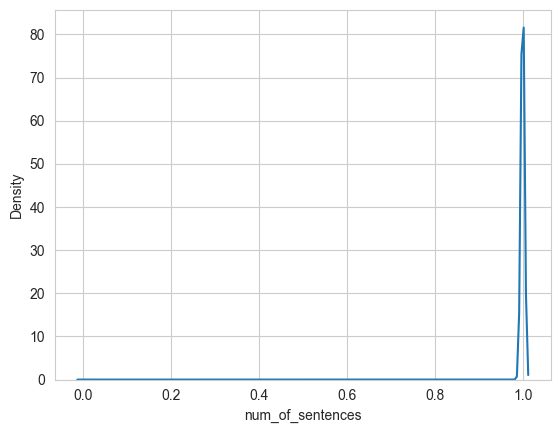

In [27]:
sns.kdeplot(df["num_of_sentences"])
plt.show()

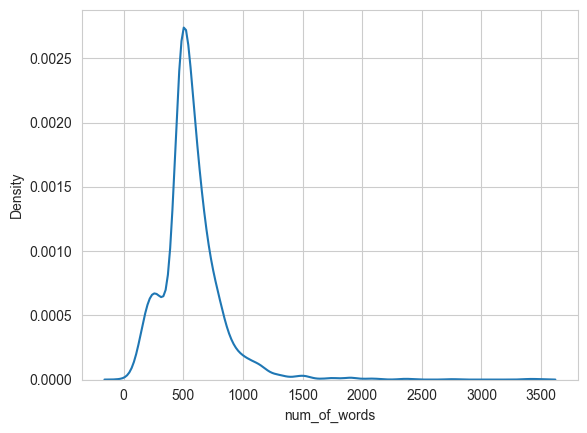

In [28]:
sns.kdeplot(df["num_of_words"])
plt.show()

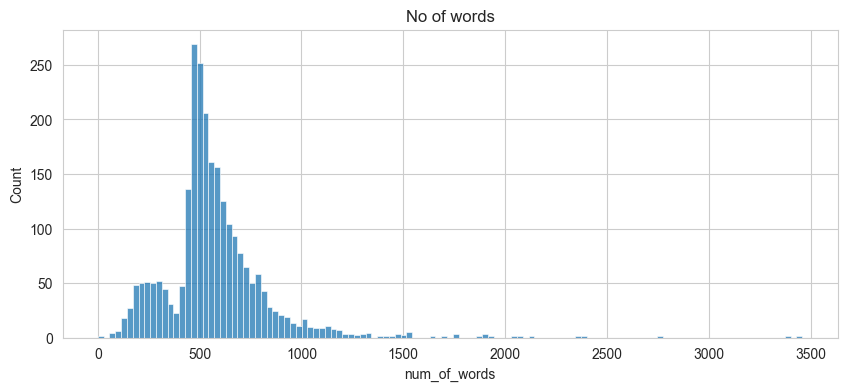

In [29]:
plt.figure(figsize=(10,4))
sns.histplot(df["num_of_words"])
plt.title("No of words")
plt.show()

## 4. Model Training

In [31]:
X = df["cleaned_text"]
y = df["Category"]

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [33]:
print(f"X train shape: {X_train.shape}")
print(f"X test shape: {X_test.shape}")
print(f"y train shape: {y_train.shape}")
print(f"y test shape: {y_test.shape}")


X train shape: (1985,)
X test shape: (497,)
y train shape: (1985,)
y test shape: (497,)


In [34]:
tfidf = TfidfVectorizer(max_features=1000)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [35]:
encoder = LabelEncoder()

y_train_encoder = encoder.fit_transform(y_train)
y_test_encoder = encoder.transform(y_test)

In [36]:
# 4. All Models
models = {
    "MultinomialNB": MultinomialNB(),
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "DecisionTree": DecisionTreeClassifier(),
    "RandomForest": RandomForestClassifier(n_estimators=50), 
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}


# 5. Training and Evaluating
results = []

for name, model in models.items():
    
        model.fit(X_train_tfidf, y_train_encoder)
        y_pred = model.predict(X_test_tfidf)

        acc = accuracy_score(y_test_encoder, y_pred)
        prec = precision_score(y_test_encoder, y_pred, average='weighted')

        results.append((name, acc, prec))


# 6. Show Results
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision"])
print(results_df.sort_values(by="Accuracy", ascending=False))

                Model  Accuracy  Precision
4             XGBoost  0.738431   0.735770
3        RandomForest  0.674044   0.651970
1  LogisticRegression  0.657948   0.682323
2        DecisionTree  0.585513   0.588430
0       MultinomialNB  0.579477   0.605511


In [37]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

In [38]:
xgb.fit(X_train_tfidf, y_train_encoder)
y_pred = xgb.predict(X_test_tfidf)

acc = accuracy_score(y_test_encoder, y_pred)
prec = precision_score(y_test_encoder, y_pred, average='weighted')

print(f"Accuracy: {acc}")
print(f"Precision: {prec}")

Accuracy: 0.738430583501006
Precision: 0.7357695195161642


In [39]:
import pickle

with open('model.pkl', 'wb') as file:
    pickle.dump(xgb, file)

with open('vectorizer.pkl', 'wb') as file:
    pickle.dump(tfidf, file)

with open('encoder.pkl', 'wb') as file:
    pickle.dump(encoder, file)